In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from graphs import n_regular_bipartite
np.random.seed(0)

# Price of Anarchy
## Model from [Aspnes et. al.](https://www.sciencedirect.com/science/article/pii/S0022000006000328)

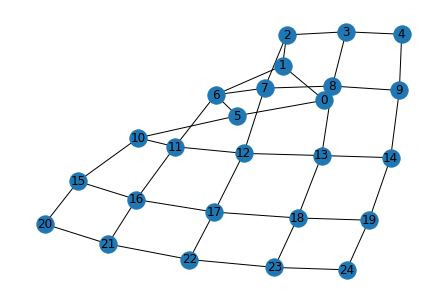

In [2]:
G = nx.grid_graph([5,5])
G = nx.convert_node_labels_to_integers(G)
plt.figure()
nx.draw(G, with_labels=True)
plt.show()

In [3]:
n = len(G.nodes)
a = np.random.rand(n)
C = 1
L = 2

## Plotting Infections on the Network
* Blue nodes are vaccinated
* Red nodes are unvaccinated and infected
* Green nodes are unvaccinated and not infected
* Purple node is a vaccinated 'patient zero'

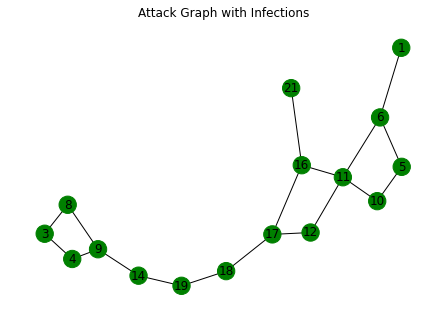

In [4]:
patient_zero = np.random.randint(n)
I_a = get_secure_nodes(G,a)
infected_nodes = simulate_infection(G,I_a,patient_zero)
G_a = G.copy()
G_a.remove_nodes_from(I_a)
colors = []

for node in G_a: 
    if node in infected_nodes:
        colors.append('red')
    else:
        colors.append('green')
plt.figure()
nx.draw(G_a, node_color=colors, with_labels=True)
plt.title('Attack Graph with Infections')
plt.show()

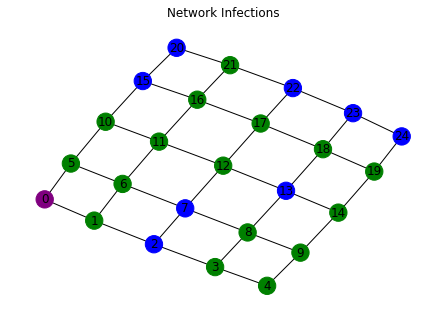

In [5]:
colors = []
for node in G: 
    if node in infected_nodes:
        colors.append('red')
    elif node in I_a:
        if node==patient_zero:
            colors.append('purple')
        else:
            colors.append('blue')
    else:
        colors.append('green')
plt.figure()
nx.draw(G, node_color=colors, with_labels=True)
plt.title('Network Infections')
plt.show()